In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon

In [10]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./AirtrafficA4.csv')

df['PASSENGERS CARRIED'] = df['PASSENGERS CARRIED'].str.replace(',', '').astype(float)
df.fillna(1, inplace=True)


# create column for year_month
d = {'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUNE': '06', 'JULY': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'}
df['MONTH'] = df['MONTH'].str.replace(' ', '')
df['year_month'] = df['YEAR'].astype(str) + "-" + df['MONTH'].map(d).astype(str)
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')
df['year_month_period'] = df['year_month'].dt.to_period("M")

# sort values by time, reset the indices
df.sort_values(by=['year_month'], inplace=True)
df.reset_index(inplace=True)

# create a column for logs of values
df['log_pass'] = np.log(df['PASSENGERS CARRIED'])

# df.head(50)

In [11]:
# Prepare the data and forecasting horizon
y = df.set_index('year_month_period')['PASSENGERS CARRIED']
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2023-09", periods=12, freq="ME")), is_relative=False
)

d:\IITB-Sem3_courses\CS215\Assignments\Assignment4\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\IITB-Sem3_courses\CS215\Assignments\Assignment4\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\IITB-Sem3_courses\CS215\Assignments\Assignment4\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


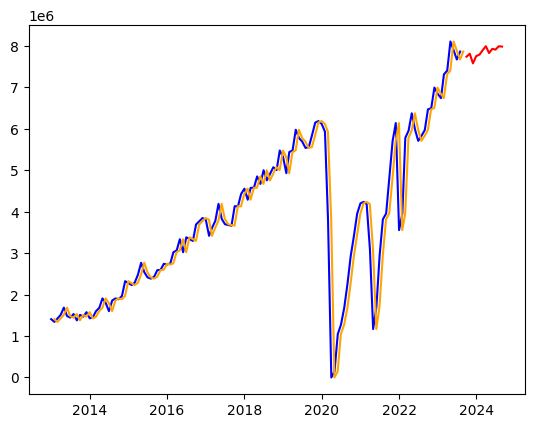

In [12]:
from sktime.forecasting.arima import ARIMA

# Fit the ARIMA model
forecaster = ARIMA(order=(10, 1, 10))
forecaster.fit(y)
prediction = forecaster.predict(fh)

plt.plot(df['year_month'], df['PASSENGERS CARRIED'], color='blue')
plt.plot(prediction, color='red')
plt.plot(y, color='orange')
plt.show()

In [13]:
# prepare submission_2.csv

periods = ['2023 SEP', '2023 OCT', '2023 NOV', '2023 DEC', '2024 JAN', '2024 FEB', '2024 MAR', '2024 APR', '2024 MAY', '2024 JUN', '2024 JUL', '2024 AUG']
df_prediction = pd.DataFrame({
    'YEAR_MONTH' : periods,
    'PASSENGERS CARRIED' : prediction.tail(12).values
    })
df_prediction.to_csv('submission_2.csv', index=False) 